In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re 
import string
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords,wordnet
import math
import sqlite3
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
con=sqlite3.connect('database.sqlite')

In [3]:
filtered_data=pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 LIMIT 100000""",con)

In [4]:
def partition(x):
    if x < 3:
        return 0
    return 1
actualdata=filtered_data['Score']
positivenegative=actualdata.map(partition)
filtered_data['Score']=positivenegative
filtered_data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
display=pd.read_sql_query(""" 
SELECT UserId, ProductId, ProfileName, Time, Score, Text, COUNT(*)
FROM Reviews
GROUP BY UserId
HAVING COUNT(*)>1
""",con)

In [6]:
display.head()

,UserId,ProductId,ProfileName,Time,Score,Text,COUNT(*)
0,#oc-R115TNMSPFT9I7,B005ZBZLT4,Breyton,1331510400,2,Overall its just OK when considering the price...,2
1,#oc-R11D9D7SHXIJB9,B005HG9ESG,"Louis E. Emory ""hoppy""",1342396800,5,"My wife has recurring extreme muscle spasms, u...",3
2,#oc-R11DNU2NBKQ23Z,B005ZBZLT4,Kim Cieszykowski,1348531200,1,This coffee is horrible and unfortunately not ...,2
3,#oc-R11O5J5ZVQE25C,B005HG9ESG,Penguin Chick,1346889600,5,This will be the bottle that you grab from the...,3
4,#oc-R12KPBODL2B5ZD,B007OSBEV0,Christopher P. Presta,1348617600,1,I didnt like this coffee. Instead of telling y...,2


In [7]:
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND UserId="AR5J8UI46CURR"
ORDER BY ProductID
""", con)
display.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


In [8]:
sort_data=filtered_data.sort_values('ProductId',axis=0,inplace=False,ascending=True,kind='quicksort')

In [9]:
final_data=sort_data.drop_duplicates(subset={'UserId','ProfileName','Time','Text'},inplace=False,keep='first')

In [10]:
final_data.shape

(87775, 10)

In [11]:
final_data=final_data[final_data.HelpfulnessNumerator<=final_data.HelpfulnessDenominator]

In [12]:
final_data.shape

(87773, 10)

In [13]:
final_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
22620,24750,2734888454,A13ISQV0U9GZIC,Sandikaye,1,1,0,1192060800,made in china,My dogs loves this chicken but its a product f...
22621,24751,2734888454,A1C298ITT645B6,Hugh G. Pritchard,0,0,1,1195948800,Dog Lover Delites,Our dogs just love them. I saw them in a pet ...
70677,76870,B00002N8SM,A19Q006CSFT011,Arlielle,0,0,0,1288396800,only one fruitfly stuck,"I had an infestation of fruitflies, they were ..."
70676,76869,B00002N8SM,A1FYH4S02BW7FN,wonderer,0,0,0,1290038400,Doesn't work!! Don't waste your money!!,Worst product I have gotten in long time. Woul...
70675,76868,B00002N8SM,AUE8TB5VHS6ZV,eyeofthestorm,0,0,0,1306972800,A big rip off,I wish I'd read the reviews before making this...


In [14]:
final_data['Score'].value_counts()

1    73592
0    14181
Name: Score, dtype: int64

In [15]:
#Text Preprocessing
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [17]:
from tqdm import tqdm

In [18]:
cleaned_reviews=[]
for sentence in tqdm(final_data['Text'].values):
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = BeautifulSoup(sentence, 'lxml').get_text()
    sentence = decontracted(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    # https://gist.github.com/sebleier/554280
    sentence = ' '.join(e.lower() for e in sentence.split() if e.lower() not in stopwords)
    cleaned_reviews.append(sentence.strip())

100%|██████████| 87773/87773 [00:28<00:00, 3125.09it/s]


In [19]:
#similarly for summary
cleaned_summary=[]
for sentence in tqdm(final_data['Summary'].values):
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = BeautifulSoup(sentence, 'lxml').get_text()
    sentence = decontracted(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentence.split() if e.lower() not in stopwords)
    cleaned_summary.append(sentence.strip())

100%|██████████| 87773/87773 [00:18<00:00, 4712.50it/s]


In [20]:
cleaned_reviews

['dogs loves chicken product china wont buying anymore hard find chicken products made usa one isnt bad good product wont take chances till know going china imports',
 'dogs love saw pet store tag attached regarding made china satisfied safe',
 'infestation fruitflies literally everywhere flying around kitchen bought product hoping least get rid weeks fly stuck going around notepad squishing buggers success rate day clearly product useless even dabbed red wine banana top column week really attracted red wine glass still nothing get stuck actually saw second fly land watched flapped wings frantically within secs unstuck product total waste money',
 'worst product gotten long time would rate no star could simply not catch single fly bug sort went hardware store bought old fashioned spiral fly paper effective unuasual influx flys house fall needed something',
 'wish would read reviews making purchase basically cardsotck box sticky outside pink ish things look like entrances trap pictures 

In [21]:
cleaned_summary

['made in china',
 'Dog Lover Delites',
 'only one fruitfly stuck',
 'Does not work Do not waste your money',
 'A big rip off',
 'THIS ITEM IS EXCELLENT TO KILL INSECTS',
 'Did not work',
 'Gross but effective',
 'Did not work for me',
 'Waste of money',
 'I should read those reviews before ordered',
 'Does not catch fruit flies',
 'Complete Waste of Money',
 'RIpoff',
 'It is junk',
 'Worthless Indoor Trap',
 'Epic Fail Worst Fly Trap Ever Created',
 'Utterly worthless',
 'Day Zero flies',
 'get something else',
 'We have so many flies in the house Have had this product for weeks and it has only stuck fly thus far',
 'This does not work',
 'Works Great',
 'Fly Trap Does not Trap Much',
 'Does not work at all',
 'Not so sticky situation',
 'great product',
 'A sure death for flies',
 'ONLY CAUGHT FLY',
 'Prettier than fly paper',
 'Not yet',
 'Does not work I have different types of traps and this is the only one that is empty',
 'Regular fly ribbon worked way better',
 'still waiting 

In [22]:
type(cleaned_reviews)

list

In [23]:
cleaned_summary=[x.lower() for x in cleaned_summary]

# Bag Of Words

In [24]:
#Bag of Words
count_vect=CountVectorizer()
final_counts=count_vect.fit_transform(cleaned_reviews)

In [25]:
final_counts.get_shape()

(87773, 54904)

In [26]:
#bigrams and unigrams
count_vect_gram=CountVectorizer(ngram_range=(1,2),min_df=10,max_df=10000)
final_counts_gram=count_vect_gram.fit_transform(cleaned_reviews)
final_counts_gram.get_shape()

(87773, 51685)

In [27]:
#Similarly for summary
count_sum=CountVectorizer()
final_count_sum=count_sum.fit_transform(cleaned_summary)
final_count_sum.get_shape()

(87773, 14709)

In [28]:
count_sum_gram=CountVectorizer(ngram_range=(1,2),min_df=10,max_df=10000)
final_count_sum_gram=count_sum_gram.fit_transform(cleaned_summary)

In [29]:
final_count_sum_gram.get_shape()

(87773, 5881)

# Tf-Idf

In [30]:
tfidf_vect=TfidfVectorizer(ngram_range=(1,2),min_df=10)
final_tfidf_vect=tfidf_vect.fit_transform(cleaned_reviews)
final_tfidf_vect.get_shape()

(87773, 51709)

In [31]:
tfidf_sum_vect=TfidfVectorizer(ngram_range=(1,2),min_df=10)
final_tfidf_sum=tfidf_sum_vect.fit_transform(cleaned_summary)
final_tfidf_sum.get_shape()

(87773, 5882)

# KNN Brute Force 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix
from collections import Counter
from sklearn import metrics

In [33]:
X=cleaned_reviews
y=np.array(final_data['Score'])

In [34]:
X

['dogs loves chicken product china wont buying anymore hard find chicken products made usa one isnt bad good product wont take chances till know going china imports',
 'dogs love saw pet store tag attached regarding made china satisfied safe',
 'infestation fruitflies literally everywhere flying around kitchen bought product hoping least get rid weeks fly stuck going around notepad squishing buggers success rate day clearly product useless even dabbed red wine banana top column week really attracted red wine glass still nothing get stuck actually saw second fly land watched flapped wings frantically within secs unstuck product total waste money',
 'worst product gotten long time would rate no star could simply not catch single fly bug sort went hardware store bought old fashioned spiral fly paper effective unuasual influx flys house fall needed something',
 'wish would read reviews making purchase basically cardsotck box sticky outside pink ish things look like entrances trap pictures 

In [35]:
y

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [36]:
X_1,X_test,y_1,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train,X_cv,y_train,y_cv=train_test_split(X_1,y_1,test_size=0.3)
count_ve=CountVectorizer()#bag of words
finalX_train=count_ve.fit_transform(X_train)
finalX_cv=count_ve.transform(X_cv)
finalX_test=count_ve.transform(X_test)

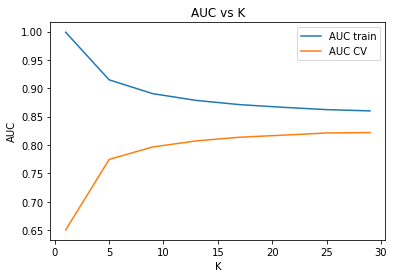

In [37]:
auc_cv=[]
auc_train=[]
cv_score=[]
K=list(range(1,30,4))
for i in K:
    knn=KNeighborsClassifier(n_neighbors=i,weights='uniform',algorithm='brute',leaf_size=30,p=2,metric='cosine')
    knn.fit(finalX_train,y_train)
    pred=knn.predict_proba(finalX_cv)[:,1]#predicting CV
    auc_cv.append(roc_auc_score(y_cv,pred))
    pred1=knn.predict_proba(finalX_train)[:,1]#predicting X_train
    auc_train.append(roc_auc_score(y_train,pred1))
    
fig=plt.figure()
ax=plt.subplot(111)
ax.plot(K, auc_train, label='AUC train')
ax.plot(K, auc_cv, label='AUC CV')
plt.title('AUC vs K')
plt.xlabel('K')
plt.ylabel('AUC')
ax.legend()
plt.show()
    

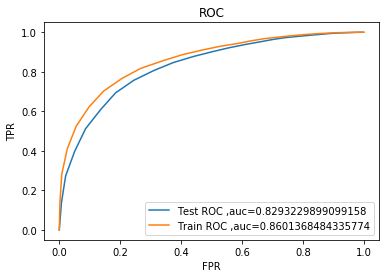

In [38]:
#Roc curve for k=29
from sklearn.metrics import confusion_matrix
knn=KNeighborsClassifier(n_neighbors=29,weights='uniform',algorithm='brute',leaf_size=30, p=2, metric='cosine')
knn.fit(finalX_train,y_train)
predi=knn.predict_proba(finalX_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=knn.predict_proba(finalX_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

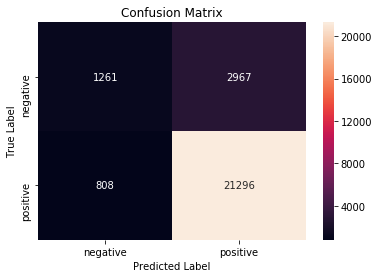

In [39]:
from sklearn.metrics import confusion_matrix
knn=KNeighborsClassifier(n_neighbors=29,weights='uniform',algorithm='brute',leaf_size=30, p=2, metric='cosine')
knn.fit(finalX_train,y_train)
predic=knn.predict(finalX_test)
import seaborn as sns
conf_mat = confusion_matrix(y_test, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# KNN on tfidf

In [40]:
tf_idf_vect=TfidfVectorizer(ngram_range=(1,2),min_df=10)
X_2,X_test2,y_2,y_test2=train_test_split(X,y,test_size=0.3,random_state=0)
X_tr_2,X_cv_2,y_tr_2,y_cv_2=train_test_split(X_2,y_2,test_size=0.3)

In [42]:
final_Xtr_2=tf_idf_vect.fit_transform(X_tr_2)
final_Xcv_2=tf_idf_vect.transform(X_cv_2)
final_Xtest_2=tf_idf_vect.transform(X_test2)

In [44]:
auc_cv=[]
auc_train=[]
K=[]
for i in range(1,50,4):
    knn=KNeighborsClassifier(n_neighbors=i,weights='uniform',algorithm='brute',leaf_size=30, p=2, metric='cosine')
    knn.fit(final_Xtr_2, y_tr_2)
    pred_2 = knn.predict_proba(final_Xcv_2)[:,1]
    pred_1=knn.predict_proba(final_Xtr_2)[:,1]
    auc_cv.append(roc_auc_score(y_cv_2,pred_2))
    auc_train.append(roc_auc_score(y_tr_2,pred_1))
    K.append(i)

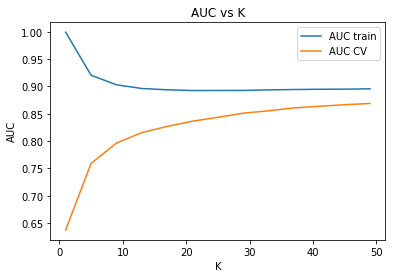

In [45]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(K, auc_train, label='AUC train')
ax.plot(K, auc_cv, label='AUC CV')
plt.title('AUC vs K')
plt.xlabel('K')
plt.ylabel('AUC')
ax.legend()
plt.show()

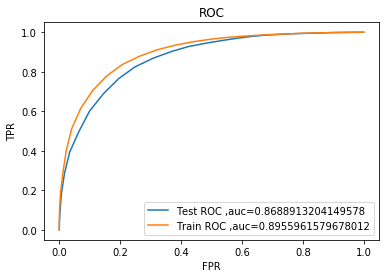

In [47]:
from sklearn.metrics import confusion_matrix
knn=KNeighborsClassifier(n_neighbors=49,weights='uniform',algorithm='brute',leaf_size=30, p=2, metric='cosine')
knn.fit(final_Xtr_2,y_tr_2)
predi=knn.predict_proba(final_Xtest_2)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test2, predi)
pred=knn.predict_proba(final_Xtr_2)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_tr_2,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test2,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_tr_2,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()